# Deep Learning with Neural Networks

Building a shallow neural network with Keras to classify mnist digits.

#### Set seed

In [1]:
import numpy as np
np.random.seed(42)

In [2]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD  # stochastic gradient descent
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

Using TensorFlow backend.


Dense neural networks: Fully connected between all the input neurons and output neurons.
Convert image data to pixel data- the pixels are the input layer to the network.  The output layer is the classes the image can be sorted into.  

In [3]:
keras.backend.clear_session()

#### Load the dataset 
inputs are x and labels (outputs) are y

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
y_train.shape

(60000,)

In [7]:
y_test.shape

(10000,)

In [8]:
X_test.shape

(10000, 28, 28)

#### Data Preprocessing

In [9]:
# convert data from array to linear for both train and test sets.
X_train = X_train.reshape(60000,784).astype('float32')
X_test = X_test.reshape(10000,784).astype('float32')

In [10]:
# convert values from high value of 255 to 1
X_train /= 255
X_test /= 255

In [11]:
# convert the y values into categorical variables
n_classes = 10
y_train = keras.utils.to_categorical(y_train, n_classes)
y_test = keras.utils.to_categorical(y_test, n_classes)

#### Design Neural Network

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 5s 78us/step - loss: 0.0959 - acc: 0.9669 - val_loss: 0.0476 - val_acc: 0.9845
Test loss: 0.04762916596084833
Test accuracy: 0.9844900018692017
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


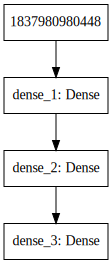

In [12]:
# build neural network
model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(784,))) #input layer
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax')) #output layer

# For a binary classification problem: compile model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, batch_size=128, epochs=1, verbose=1, validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

model.summary()
SVG(model_to_dot(model).create(prog='dot', format='svg'))